<a href="https://colab.research.google.com/github/abdipourasl/CNN/blob/main/projrct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.chdir('/content/drive/My Drive/Pics - Beta 2')
os.listdir('/content/drive/My Drive/Pics - Beta 2')

['OCD', 'norm']

In [6]:
data_dir= '/content/drive/My Drive/Pics - Beta 2'

In [7]:
os.listdir(os.path.join(data_dir,'OCD'))

['OCD_104.png',
 'OCD_10.png',
 'OCD_102.png',
 'OCD_1.png',
 'OCD_101.png',
 'OCD_237.png',
 'OCD_24.png',
 'OCD_242.png',
 'OCD_235.png',
 'OCD_240.png',
 'OCD_232.png',
 'OCD_238.png',
 'OCD_239.png',
 'OCD_233.png',
 'OCD_228.png',
 'OCD_236.png',
 'OCD_234.png',
 'OCD_230.png',
 'OCD_23.png',
 'OCD_231.png',
 'OCD_227.png',
 'OCD_229.png',
 'OCD_224.png',
 'OCD_225.png',
 'OCD_226.png',
 'OCD_223.png',
 'OCD_220.png',
 'OCD_222.png',
 'OCD_221.png',
 'OCD_218.png',
 'OCD_213.png',
 'OCD_219.png',
 'OCD_215.png',
 'OCD_217.png',
 'OCD_22.png',
 'OCD_216.png',
 'OCD_214.png',
 'OCD_212.png',
 'OCD_211.png',
 'OCD_210.png',
 'OCD_209.png',
 'OCD_208.png',
 'OCD_206.png',
 'OCD_205.png',
 'OCD_21.png',
 'OCD_207.png',
 'OCD_199.png',
 'OCD_203.png',
 'OCD_202.png',
 'OCD_204.png',
 'OCD_198.png',
 'OCD_2.png',
 'OCD_20.png',
 'OCD_196.png',
 'OCD_201.png',
 'OCD_200.png',
 'OCD_194.png',
 'OCD_197.png',
 'OCD_195.png',
 'OCD_193.png',
 'OCD_190.png',
 'OCD_192.png',
 'OCD_191.png',
 '

In [8]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [9]:
img=cv2.imread(os.path.join('/content/drive/My Drive/Pics - Beta 2','OCD','OCD_855.png'))
img.shape


(150, 621, 3)

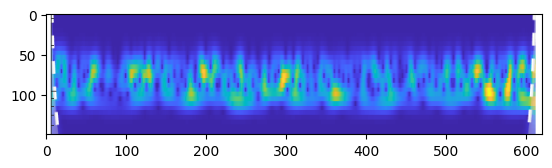

In [10]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [12]:
import numpy as np

In [ ]:
#tf.data.Dataset??

In [13]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Pics - Beta 2')

Found 1745 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator= data.as_numpy_iterator()


In [15]:
batch=data_iterator.next()

In [16]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int32)

In [17]:
batch[0].shape

(32, 256, 256, 3)

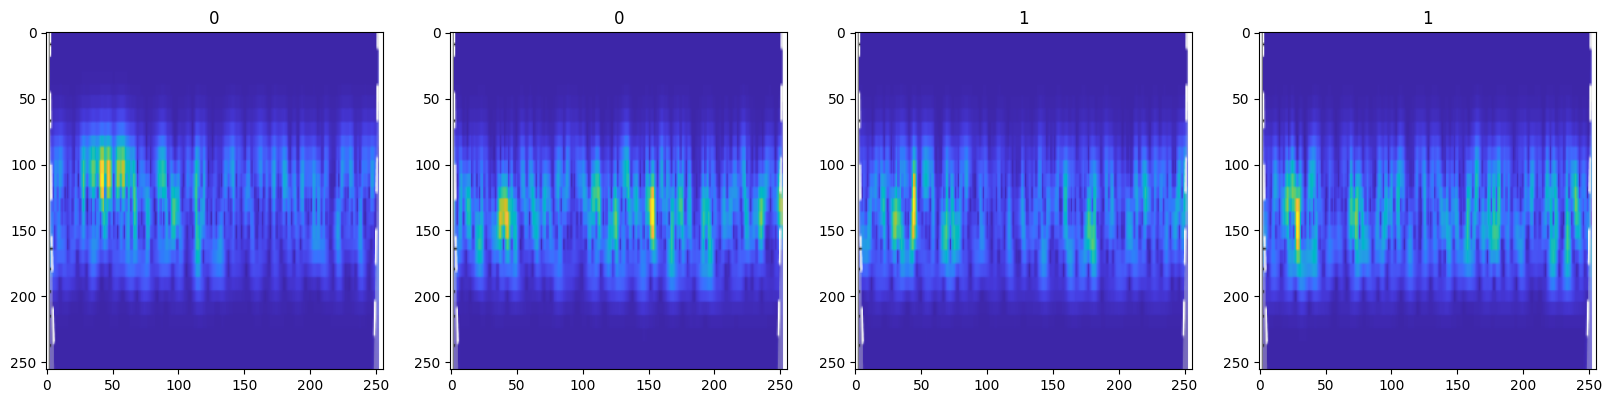

In [18]:
# 0 = norm
# 1 = OCD


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [19]:
data.as_numpy_iterator().next()

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [132.51367 , 132.51367 , 132.51367 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [132.51367 , 132.51367 , 132.51367 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [132.51367 , 132.51367 , 132.51367 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [20]:
data.as_numpy_iterator().next()[0].max()

255.0

In [21]:
data= data.map(lambda x,y:(x/255,y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.5196615 , 0.5196615 , 0.5196615 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.5196615 , 0.5196615 , 0.5196615 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.5196615 , 0.5196615 , 0.5196615 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [23]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [ ]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [25]:
len(data)

55

In [26]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


In [27]:
len(train)

38

# Deep Learning Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
38/38 [==============================] - 98s 3s/step - loss: 0.7928 - accuracy: 0.5691 - val_loss: 0.6362 - val_accuracy: 0.6420
Epoch 2/20
38/38 [==============================] - 103s 3s/step - loss: 0.5891 - accuracy: 0.6678 - val_loss: 0.5684 - val_accuracy: 0.7045
Epoch 3/20
38/38 [==============================] - 93s 2s/step - loss: 0.5313 - accuracy: 0.7327 - val_loss: 0.5534 - val_accuracy: 0.6989
Epoch 4/20
38/38 [==============================] - 102s 3s/step - loss: 0.4726 - accuracy: 0.7722 - val_loss: 0.5136 - val_accuracy: 0.7273
Epoch 5/20
38/38 [==============================] - 102s 3s/step - loss: 0.4150 - accuracy: 0.8117 - val_loss: 0.5125 - val_accuracy: 0.7528
Epoch 6/20
38/38 [==============================] - 103s 3s/step - loss: 0.3807 - accuracy: 0.8207 - val_loss: 0.4338 - val_accuracy: 0.7955
Epoch 7/20
38/38 [==============================] - 109s 3s/step - loss: 0.3042 - accuracy: 0.8651 - val_loss: 0.4180 - val_accuracy: 0.7898
Epoch 8/20
38/3

In [36]:
hist.history

{'loss': [0.7928357720375061,
  0.5891499519348145,
  0.5313277840614319,
  0.47263988852500916,
  0.4149942696094513,
  0.3807048201560974,
  0.304161012172699,
  0.3410070240497589,
  0.22823934257030487,
  0.15799807012081146,
  0.1355164498090744,
  0.08148007839918137,
  0.06097080931067467,
  0.057947367429733276,
  0.04467412084341049,
  0.030680175870656967,
  0.013016036711633205,
  0.009087991900742054,
  0.008859725669026375,
  0.007602501194924116],
 'accuracy': [0.5690789222717285,
  0.6677631735801697,
  0.7327302694320679,
  0.7722039222717285,
  0.8116776347160339,
  0.8207237124443054,
  0.8651315569877625,
  0.8404605388641357,
  0.9037829041481018,
  0.9399670958518982,
  0.9506579041481018,
  0.9761512875556946,
  0.9794408082962036,
  0.9835526347160339,
  0.9851973652839661,
  0.9925987124443054,
  0.9983552694320679,
  0.9983552694320679,
  0.9975329041481018,
  0.9975329041481018],
 'val_loss': [0.6361598372459412,
  0.5684171319007874,
  0.5534022450447083,
  0

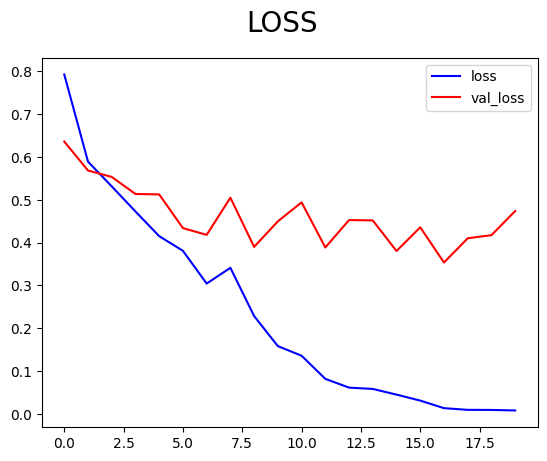

In [37]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

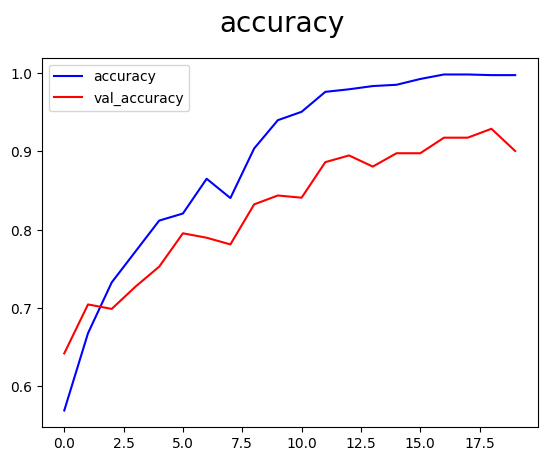

In [38]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [39]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [40]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 978ms/step


In [42]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 0.8815789222717285 Recall: 0.8701298832893372  Accuracy : 0.8812500238418579 
